# MAT-Tools Framework

Copyright (C) Apr. 2025, License GPL Version 3 or superior (see LICENSE file)

**Preparação:** Instalar os pacotes do MAT-tools

In [1]:
!pip install mat-data mat-model mat-classification mat-similarity geojson geohash2

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 36.6 MB/s eta 0:00:00
  Created wheel for geohash2: filename=geohash2-1.1-py

## Passo 1. Carregar dados
Usaremos dados do repositório do MAT-tools, import do pacote `matdata` (depende de: [mat-data](https://github.com/ttportela/mat-data)):

### 1.1. Sample data
Carregamos os dados diretamente do repositório:

In [2]:
from matdata.dataset import load_ds

dataset='mat.FoursquareNYC'

data = load_ds(dataset, missing='-999')
data

Loading dataset file: https://github.com/mat-analysis/datasets/tree/main/mat/FoursquareNYC/


,space,time,day,poi,type,root_type,rating,weather,tid,label
0,40.8331652006224 -73.9418603427692,317,Monday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clear,126,6
1,40.8340978041072 -73.9452672225881,1404,Monday,Galaxy Gourmet Deli,Deli / Bodega,Food,8.2,Clouds,126,6
2,40.8331652006224 -73.9418603427692,0,Tuesday,The Lair Of Modern Strange Cowboy,Home (private),Residence,-1.0,Clouds,126,6
3,40.7646959283254 -73.8851974964414,1069,Thursday,Popeyes Louisiana Kitchen,Fried Chicken Joint,Food,6.6,Clear,126,6
4,40.7660790376824 -73.8835287094116,1120,Thursday,MTA Bus Operations Depot - LaGuardia,Bus Station,Travel & Transport,-1.0,Clear,126,6
...,...,...,...,...,...,...,...,...,...,...
66941,40.7047332789043 -73.9877378940582,1037,Friday,Miami Ad School Brooklyn,General College & University,College & University,-1.0,Clouds,29563,1070
66942,40.6951627360199 -73.9954478691072,1210,Friday,Lantern Thai Kitchen,Thai Restaurant,Food,8.0,Clouds,29563,1070
66943,40.6978026652822 -73.9941451630314,481,Saturday,Eastern Athletic Club,Gym,Outdoors & Recreation,6.9,Clouds,29563,1070
66944,40.6946728967503 -73.9940820360805,819,Saturday,Starbucks,Coffee Shop,Food,7.0,Clouds,29563,1070


Extratificando as trajetórias de 10 classes (aleatoriamente):

In [3]:
from matdata.preprocess import klabels_stratify
train, test = klabels_stratify(data, kl=10)

print("Classes:", train.label.unique())

print("Trajs. Treino:", len(train.tid.unique()) )
print("Trajs. Teste :", len(test.tid.unique()) )

Spliting Data (class-balanced):   0%|          | 0/10 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/10 [00:00<?, ?it/s]

Sorting data:   0%|          | 0/10 [00:00<?, ?it/s]

Classes: [ 84 164 181 390 553 646 662 702 768 901]
Trajs. Treino: 112
Trajs. Teste : 56


Salvando os dados na pasta `sample/data`:


In [4]:
import os
from matdata.converter import df2csv

data_path = 'sample/data/FoursquareNYC'
if not os.path.exists(data_path):
    os.makedirs(data_path)

df2csv(train, data_path, 'train')
df2csv(test, data_path, 'test')

Writing CSV: sample/data/FoursquareNYC/train.csv
Done.
 --------------------------------------------------------------------------------
Writing CSV: sample/data/FoursquareNYC/test.csv
Done.
 --------------------------------------------------------------------------------


,tid,label,space,time,day,poi,type,root_type,rating,weather
0,2282,84,40.7678083915285 -73.9102541593408,499,Monday,24-00 42nd Street,Cafeteria,Food,-1.0,Clouds
1,2282,84,40.7636761665344 -73.9240340000000,500,Monday,Fat Cat Tattoos,Tattoo Parlor,Shop & Service,7.6,Clouds
2,2282,84,40.7629505214860 -73.9278280735016,500,Monday,Dunkin' Donuts,Donut Shop,Food,5.8,Clouds
3,2282,84,40.7478115621338 -73.9402386813564,507,Monday,Dutch Kills,Cocktail Bar,Nightlife Spot,9.2,Clouds
4,2282,84,40.7537124772213 -73.9737712965716,639,Monday,New York Public Library - Grand Central,Library,Professional & Other Places,-1.0,Clouds
...,...,...,...,...,...,...,...,...,...,...
120,25010,901,40.8641411164034 -73.9191414961577,40,Thursday,MTA Subway - 207th St (1),Metro Station,Travel & Transport,-1.0,Snow
121,25010,901,40.8693915901654 -73.9152431488037,41,Thursday,MTA Subway - 215th St (1),Metro Station,Travel & Transport,-1.0,Snow
122,25010,901,40.8757357925522 -73.9085054397583,44,Thursday,The Secret Stairs,Scenic Lookout,Outdoors & Recreation,-1.0,Snow
123,25010,901,40.8897749706367 -73.8976573297774,51,Thursday,Leo,College Engineering Building,College & University,-1.0,Snow


## Passo 2. Extração das Movelets

O `HiPerMovelets` é um método que extrai as subtrajetórias discriminantes de um conjunto de trajetórias. O objetivo é encontrar os padrões que diferenciam os objetos (pessoas, animais, carros, etc.)

a) Primeiro vamos aplicar baixar e aplicar o [HiPerMovelets](https://github.com/bigdata-ufsc/HiPerMovelets) e o arquivo .json de configuração, por exemplo:

In [5]:
prog_path = 'sample/programs'
if not os.path.exists(prog_path):
    os.makedirs(prog_path)

# To download the excutable:
!curl -o sample/programs/MoveletDiscovery.jar https://raw.githubusercontent.com/mat-analysis/mat-tools/main/jarfiles/MoveletDiscovery.jar

!curl -o sample/data/FoursquareNYC/FoursquareNYC.json https://raw.githubusercontent.com/mat-analysis/datasets/main/mat/FoursquareNYC/FoursquareNYC.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.1M  100 77.1M    0     0  21.6M      0  0:00:03  0:00:03 --:--:-- 21.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2058  100  2058    0     0   7165      0 --:--:-- --:--:-- --:--:--  7170


In [6]:
res_path = 'sample/results'
if not os.path.exists(res_path):
    os.makedirs(res_path)

# Running the movelet extractor HiPerMovelets:
!java -Xmx7G -jar "./sample/programs/MoveletDiscovery.jar" \
-curpath "./sample/data/FoursquareNYC" \
-respath "./sample/results/hiper" \
-descfile "./sample/data/FoursquareNYC/FoursquareNYC.json" \
-nt 1 -version hiper -ms -1 -Ms -3 -TC 1d

Wed Jul 02 19:57:10 UTC 2025
Starting Movelets +Log extractor 
Configurations:
   -curpath		Datasets directory:	./sample/data/FoursquareNYC
   -respath		Results directory: 	./sample/results/hiper/Movelets/HIPER_Log_FoursquareNYC_LSP_ED
   -descfile 		Description file : 	./sample/data/FoursquareNYC/FoursquareNYC.json
+-------------+--------------------+---------------------+----------------------------------------------+
| Option      | Description        | Value               | Help                                         |
+-------------+--------------------+---------------------+----------------------------------------------+
| -nt         | Allowed Threads    | 1                   |                                              |
| -ms         | Min size           | -1                  | Any positive | -1 | Log: -2                  |
| -Ms         | Max size           | -3                  | Any | All sizes: -1 | Log: -3 or -4          |
| -mnf        | Max. Dimensions    | -1       

O `HiPerMovelets` cria arquivos das movelets (.JSON) e matrizes de distâncias de cada movelet para cada trajetória (em arquivos .csv) divididos em pastas para cada classe separadamente. Porém, precisamos unir essas matrizes em arquivos únicos para usar no classificador. Vamos usar um script do mat-classification para juntar os `train.csv` e `test.csv`:

In [7]:
# Normalmente no computador o script é instalado e pode ser usado assim:
#!python3 MAT-MergeDatasets.py ./sample/results/hiper

# No Collab precisamos baixar:
!curl -o sample/programs/MAT-MergeDatasets.py https://raw.githubusercontent.com/mat-analysis/mat-classification/main/scripts/helpers/MAT-MergeDatasets.py

!python3 ./sample/programs/MAT-MergeDatasets.py ./sample/results/hiper

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1912  100  1912    0     0   7300      0 --:--:-- --:--:-- --:--:--  7297
Loading files - train.csv
Writing train.csv file
Done.
Loading files - test.csv
Writing test.csv file
Done.


In [8]:
import pandas as pd
movelets_train = pd.read_csv('./sample/results/hiper/train.csv')
movelets_test = pd.read_csv('./sample/results/hiper/test.csv')

### Passo 3: Classificação com Movelets

Usaremos o Movelet Multi-Layer Perceptron (MMLP) que é uma rede neural para movelets de entrada, então passaremos as matrizes de movelets por trajetória (dos arquivos de treino e teste que unimos antes).

Esta é uma forma de fazer um experimento com os dados divididos em treino e teste, onde o teste são as trajetórias que queremos classificar. Neste caso, queremos descobrir a qual usuário cada trajetória pertence:

In [9]:
from matclassification.methods import MMLP

model = MMLP()
model.prepare_input(movelets_train, movelets_test)
model.train()
model.test()

2025-07-02 19:59:38.088058

[MMLP:] Building model
[MMLP:] Training hiperparameter model
Epoch 1/80
1/1 - 2s - 2s/step - accuracy: 0.1339 - f1: 0.0000e+00 - loss: 2.3038 - top_k_categorical_accuracy: 0.5536 - val_accuracy: 0.8393 - val_f1: 0.0000e+00 - val_loss: 2.0580 - val_top_k_categorical_accuracy: 0.9821
Epoch 2/80
1/1 - 1s - 719ms/step - accuracy: 0.8036 - f1: 0.0000e+00 - loss: 2.0328 - top_k_categorical_accuracy: 0.9464 - val_accuracy: 0.9107 - val_f1: 0.0000e+00 - val_loss: 1.8423 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/80
1/1 - 0s - 87ms/step - accuracy: 0.9732 - f1: 0.0000e+00 - loss: 1.7899 - top_k_categorical_accuracy: 1.0000 - val_accuracy: 0.9107 - val_f1: 0.0000e+00 - val_loss: 1.6384 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/80
1/1 - 0s - 82ms/step - accuracy: 0.9643 - f1: 0.0000e+00 - loss: 1.6108 - top_k_categorical_accuracy: 1.0000 - val_accuracy: 0.9107 - val_f1: 0.1017 - val_loss: 1.4486 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/80
1/1 - 0s 

Model Testing:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/80
1/1 - 2s - 2s/step - accuracy: 0.1518 - f1: 0.0000e+00 - loss: 2.2754 - top_k_categorical_accuracy: 0.6071 - val_accuracy: 0.8750 - val_f1: 0.0000e+00 - val_loss: 2.0516 - val_top_k_categorical_accuracy: 0.9643
Epoch 2/80
1/1 - 0s - 88ms/step - accuracy: 0.8214 - f1: 0.0000e+00 - loss: 2.0324 - top_k_categorical_accuracy: 0.9732 - val_accuracy: 0.9464 - val_f1: 0.0000e+00 - val_loss: 1.8403 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/80
1/1 - 0s - 133ms/step - accuracy: 0.9732 - f1: 0.0000e+00 - loss: 1.7932 - top_k_categorical_accuracy: 1.0000 - val_accuracy: 0.9464 - val_f1: 0.0000e+00 - val_loss: 1.6396 - val_top_k_categorical_accuracy: 1.0000
Epoch 4/80
1/1 - 0s - 136ms/step - accuracy: 0.9911 - f1: 0.0000e+00 - loss: 1.5716 - top_k_categorical_accuracy: 1.0000 - val_accuracy: 0.9464 - val_f1: 0.0690 - val_loss: 1.4512 - val_top_k_categorical_accuracy: 1.0000
Epoch 5/80
1/1 - 0s - 91ms/step - accuracy: 1.0000 - f1: 0.0690 - loss: 1.3685 - top_k_categorical_accuracy:

(   accuracy  accuracyTopK5  balanced_accuracy  precision_macro  recall_macro  \
 0  0.982143            1.0              0.975         0.979832      0.988889   
 
    f1_macro    clstime  
 0     0.975  78589.127  ,
 array([[9.99999940e-01, 4.10112591e-13, 3.22900289e-13, 2.67029291e-13,
         4.50969625e-14, 1.31471537e-12, 2.53389351e-13, 1.08948989e-13,
         8.87155678e-14, 1.40903619e-13],
        [9.99999940e-01, 1.04582548e-13, 1.02894440e-12, 4.48030041e-13,
         8.18960446e-14, 7.14085637e-13, 7.13606366e-13, 1.65494829e-13,
         1.19159863e-13, 1.90035230e-13],
        [9.99999940e-01, 4.89558150e-15, 3.73866960e-14, 1.41930696e-14,
         3.74016546e-15, 3.40313003e-14, 1.27993023e-14, 1.09039568e-14,
         4.46229196e-15, 1.12599605e-14],
        [9.99999940e-01, 4.09588840e-13, 5.80069304e-13, 3.65818649e-13,
         9.51113103e-14, 9.85570566e-13, 4.84663254e-13, 1.12437207e-13,
         8.09745066e-14, 1.65624310e-13],
        [9.99999940e-01, 3.4397

In [10]:
# Para exibir as métricas da classificação:
model.summary()

,accuracy,accuracyTopK5,balanced_accuracy,precision_macro,recall_macro,f1_macro,clstime
0,0.982143,1.0,0.975,0.979832,0.988889,0.975,78589.127


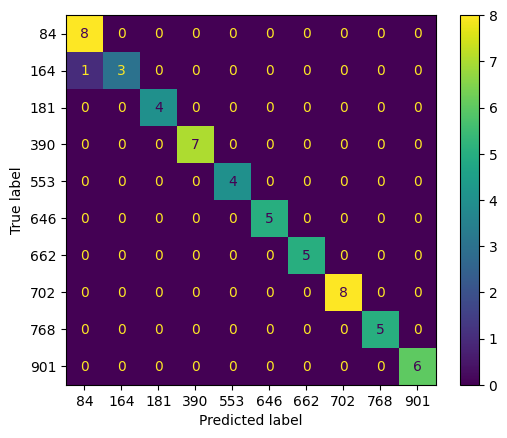

In [11]:
# Matriz de confusão mostra onde o classificador errou mais
# comparando a classe que foi predita e a classe correta da trajetória:
model.cm()

In [12]:
# Lendo trajetórias como objetos de mat-model
from matmodel.util.parsers import df2trajectory
T, data_desc = df2trajectory(data, data_desc='sample/data/FoursquareNYC/FoursquareNYC.json')

Converting Trajectories:   0%|          | 0/3079 [00:00<?, ?it/s]

In [13]:
T[0].display()

𝘛𐄁126 	𝘱1⟨(40.833 -73.942), 2024-01-01 05:17:00, Monday, The Lair Of Modern Strange Cowboy, Home (private), Residence, -1.0, Clear⟩↴
	𝘱2⟨(40.834 -73.945), 2024-01-01 23:24:00, Monday, Galaxy Gourmet Deli, Deli / Bodega, Food, 8.2, Clouds⟩↴
	𝘱3⟨(40.833 -73.942), 2024-01-01 00:00:00, Tuesday, The Lair Of Modern Strange Cowboy, Home (private), Residence, -1.0, Clouds⟩↴
	𝘱4⟨(40.765 -73.885), 2024-01-01 17:49:00, Thursday, Popeyes Louisiana Kitchen, Fried Chicken Joint, Food, 6.6, Clear⟩↴
	𝘱5⟨(40.766 -73.884), 2024-01-01 18:40:00, Thursday, MTA Bus Operations Depot - LaGuardia, Bus Station, Travel & Transport, -1.0, Clear⟩↴
	𝘱6⟨(40.730 -73.861), 2024-01-01 21:20:00, Thursday, MTA Subway - 63rd Dr/Rego Park (M/R), Metro Station, Travel & Transport, -1.0, Clear⟩↴
	𝘱7⟨(40.750 -73.988), 2024-01-01 22:02:00, Thursday, MTA Subway - 34th St/Herald Sq (B/D/F/M/N/Q/R/W), Metro Station, Travel & Transport, -1.0, Clear⟩↴
	𝘱8⟨(40.690 -73.982), 2024-01-01 22:30:00, Thursday, NYCT Transit Survey Unit, Of

In [15]:
# Lendo movelets como objetos de mat-model
from matmodel.util.parsers import json2movelet
import json

mov_file = './sample/results/hiper/Movelets/HIPER_Log_FoursquareNYC_LSP_ED/164/moveletsOnTrain.json'

with open(mov_file, 'r') as f:
    M = json2movelet(f)

Reading Movelets:   0%|          | 0/72 [00:00<?, ?it/s]

In [17]:
M[0]

𝓜𐄁0❲100.00%❳ 𝘱18⟨Outdoors & Recreation, Sunday, (40.726 -74.004)⟩

---
# That's all, thanks!

\# By Tarlis Tortelli & Vanessa Machado (2025)